In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
data.shape

(13320, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
#null values in society is pretty high , so we drop that column . Also we drop null values in size and bath as they are 
#pretty small numbers
data.drop(["society"] , axis= 1 , inplace = True)

In [9]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
data.shape

(13320, 8)

In [11]:
data.dropna(subset=["size"] , inplace = True)

In [12]:
data.shape

(13304, 8)

In [13]:
data.dropna(subset = ["location"] , inplace = True)

In [14]:
data.shape

(13303, 8)

In [15]:
data.dropna(subset = ["bath"] , inplace = True)

In [16]:
data.shape

(13246, 8)

In [17]:
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         536
price             0
dtype: int64

In [18]:
data.describe()

,bath,balcony,price
count,13246.000000,12710.000000,13246.000000
mean,2.692586,1.584343,112.389392
std,1.341506,0.817287,149.076587
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [19]:
#so we saw that balcony contains only 3 values -  So we can easily fill null values
data["balcony"].fillna(data["balcony"].median() , inplace = True)

In [20]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [21]:
data["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [22]:
data["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [23]:
#so we may drop our availability column - 
data.drop(["availability"] , axis = 1 ,inplace = True)

In [24]:
data.shape

(13246, 7)

In [25]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [26]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [27]:
#different words for same purpose is used . we have to remove unwanted words - 
data["bhk"] = data["size"].apply(lambda x : int(x.split(' ')[0]))

In [28]:
data["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [29]:
data.head()  #so we have some very large plots with many bedrooms

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [30]:
data[data.bhk > 10] #clearly we saw some unmatch between total_sqft and bhk which we might need to address later 

,area_type,location,size,total_sqft,bath,balcony,price,bhk
459,Super built-up Area,1 Giri Nagar,11 BHK,5000,9.0,3.0,360.0,11
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
1768,Plot Area,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,0.0,170.0,11
3379,Super built-up Area,1Hanuman Nagar,19 BHK,2000,16.0,2.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,16 BHK,10000,16.0,2.0,550.0,16
3853,Plot Area,1 Annasandrapalya,11 Bedroom,1200,6.0,3.0,150.0,11
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
4916,Super built-up Area,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14
6533,Plot Area,Mysore Road,12 Bedroom,2232,6.0,2.0,300.0,12
7979,Super built-up Area,1 Immadihalli,11 BHK,6000,12.0,2.0,150.0,11


In [31]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [32]:
#We will identigy those range entries - 
def identify(x):
    try:
        float(x)
    except:
        return True
    return False

In [33]:
data[data["total_sqft"].apply(identify)].shape #so we have around 190 rows which contains range or unwanted form data

(190, 8)

In [34]:
#for range we will find mean and for rest we will ignore - 
def find_mean(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [35]:
data["total_sqft_new"] = data["total_sqft"].apply(find_mean) 

In [36]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_new
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0


In [37]:
data.shape

(13246, 9)

In [38]:
data.isnull().sum()

area_type          0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
bhk                0
total_sqft_new    46
dtype: int64

In [39]:
data.dropna(inplace = True)

In [40]:
data.shape

(13200, 9)

In [41]:
#we will drop total_sqft and size
data.drop(["total_sqft","size"] , axis = 1  , inplace = True)

In [42]:
data = data.rename(columns = {"total_sqft_new" : "total_sqft"})

In [43]:
data.head()

,area_type,location,bath,balcony,price,bhk,total_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0


In [44]:
data.shape

(13200, 7)

In [45]:
#With some research we can find that in every deal : price per sqr feat is important.
data["price_per_sqft"] = data["price"]*1000000/data["total_sqft"]
data.head()

,area_type,location,bath,balcony,price,bhk,total_sqft,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,36998.106061
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,46153.846154
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,43055.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,62458.908613
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,42500.000000


In [46]:
len(data["location"].unique())

1298

In [47]:
#we will count most frequent locations-
data["location"] = data.location.apply(lambda x : x.strip())  
location = data.groupby('location')["location"].agg('count').sort_values(ascending = False)
location

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [48]:
#lets try to get some good combinations - 
print(len(location[location<50]))
print(len(location[location<40]))
print(len(location[location<30]))
print(len(location[location<20]))
print(len(location[location<10]))

1233
1210
1187
1139
1033


In [49]:
len(location[location<15]) - len(location[location<10])

69

In [50]:
location_less_10 = location[location<15]
location_less_10

location
Chamrajpet               14
1st Block Jayanagar      14
Doddakallasandra         14
Sarakki Nagar            14
Sultan Palaya            14
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1102, dtype: int64

In [51]:
data["location"] = data.location.apply(lambda x: "other" if x in location_less_10 else x)

In [52]:
data.head()

,area_type,location,bath,balcony,price,bhk,total_sqft,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,36998.106061
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,46153.846154
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,43055.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,62458.908613
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,42500.000000


In [53]:
len(data.location.unique())

186

# Detecting and Removing Outliers

In [54]:
data.shape

(13200, 8)

In [55]:
#Possible matchups - 1.total_sqft to bhk and 2.Price to bhk  3.Extreme low and high prices
data = data[~(data.total_sqft /data.bhk <250)]   #1 bhk = 250 - 350 sqft

In [56]:
data.shape

(12588, 8)

<AxesSubplot:xlabel='bhk', ylabel='price'>

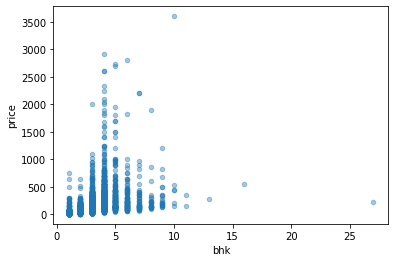

In [57]:
#We analyze wether there is ambguity in number of bhk and price
data.plot(kind = "scatter" , x = "bhk" , y="price" , alpha = 0.4)

#  One hot encoding

In [58]:
data.head()

,area_type,location,bath,balcony,price,bhk,total_sqft,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,36998.106061
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,46153.846154
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,43055.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,62458.908613
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,42500.000000


In [59]:
data.shape

(12588, 8)

In [60]:
data.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [61]:
dummies1 = pd.get_dummies(data.area_type)

In [62]:
dummies1.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [63]:
data = pd.concat([data,dummies1],axis="columns")

In [64]:
data.head()

,area_type,location,bath,balcony,price,bhk,total_sqft,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,36998.106061,0,0,0,1
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,46153.846154,0,0,1,0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,43055.555556,1,0,0,0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,62458.908613,0,0,0,1
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,42500.000000,0,0,0,1


In [65]:
data.shape

(12588, 12)

In [66]:
data.drop(["area_type"],axis = 1 , inplace = True)

In [67]:
data.shape

(12588, 11)

In [68]:
data.head()

,location,bath,balcony,price,bhk,total_sqft,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,36998.106061,0,0,0,1
1,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,46153.846154,0,0,1,0
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,43055.555556,1,0,0,0
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,62458.908613,0,0,0,1
4,Kothanur,2.0,1.0,51.00,2,1200.0,42500.000000,0,0,0,1


In [69]:
dummies2 = pd.get_dummies(data.location)

In [70]:
dummies2.head()

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data = pd.concat([data,dummies2],axis="columns")

In [72]:
data.head()

,location,bath,balcony,price,bhk,total_sqft,price_per_sqft,Built-up Area,Carpet Area,Plot Area,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,36998.106061,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,46153.846154,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,43055.555556,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,62458.908613,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2.0,1.0,51.00,2,1200.0,42500.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data.shape

(12588, 197)

In [74]:
data.drop(["location"] , axis = 1  , inplace = True)

In [75]:
data.shape

(12588, 196)

In [76]:
data.isnull().sum()

bath                  0
balcony               0
price                 0
bhk                   0
total_sqft            0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yeshwanthpur          0
other                 0
Length: 196, dtype: int64

In [77]:
x_data = data.drop("price",axis = 1)

In [78]:
x_data.head()

,bath,balcony,bhk,total_sqft,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,2.0,1.0,2,1056.0,36998.106061,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,4,2600.0,46153.846154,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,3,1440.0,43055.555556,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,3,1521.0,62458.908613,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,2,1200.0,42500.000000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
y_data = data.price

In [80]:
y_data.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.25 , random_state = 10)

In [83]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train , y_train)

LinearRegression()

In [84]:
#tree.score(x_test , y_test)

In [85]:
linear.score(x_test , y_test)

0.40041792839211676

In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5 , test_size = 0.25 , random_state = 0)

cross_val_score(LinearRegression() , x_data , y_data , cv = cv)

array([0.73163546, 0.47544181, 0.59662738, 0.73480359, 0.53207226])

In [87]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [88]:
def find_best_model_gridsearch(x , y):
    algos = {
        "linear_regression" : {
            "model" : LinearRegression(),
            "params" : {
                "normalize" : [True , False]
            }
        },
        "lasso" : {
            "model" : Lasso(),
            "params" : {
                "alpha" : [1,2],
                "selection" : ["random" , "cyclic"]
            }
        },
        "decision_tree" : {
            "model": DecisionTreeRegressor(),
            "params" : {
                "criterion" : ['mse' , 'friedman_mse'],
                "splitter" : ["best" , "random"]
            }
        },
        "Random_forest" : {
            "model" : RandomForestRegressor(),
            "params" : {
                "criterion" : ['mse' , 'friedman_mse'],
                "n_estimators" : [50 ,100 , 150 , 200 , 250 , 300]
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5 , test_size = 0.25 , random_state = 0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config["model"] , config["params"] , cv = cv , return_train_score = False)
        gs.fit(x_data , y_data)
        scores.append({
            "model":algo_name,
            "best_score": gs.best_score_,
            "best_params":gs.best_params_
        })
    return pd.DataFrame(scores , columns = ["model" , "best_score" , "best_params"])

In [89]:
find_best_model_gridsearch(x_data , y_data)

,model,best_score,best_params
0,linear_regression,0.619796,{'normalize': True}
1,lasso,0.629460,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.916227,"{'criterion': 'mse', 'splitter': 'best'}"
3,Random_forest,0.955177,"{'criterion': 'mse', 'n_estimators': 50}"


In [92]:
#So we choose Random Forest as our model
forest = RandomForestRegressor(n_estimators = 50 , criterion = "mse")
forest.fit(x_train , y_train)

RandomForestRegressor(n_estimators=50)

In [93]:
forest.score(x_test,y_test)

0.9498070673393577

# Lets export our model 

In [94]:
import pickle
with open('Banglore_home_Price_Prediction.pickle','wb') as f:
    pickle.dump(forest,f)

In [96]:
import json
columns = {
    "data_columns" : [col.lower() for col in x_data.columns]
}
with open("columns.json" , "w") as f:
    f.write(json.dumps(columns))